In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

In [43]:
sns.set_theme("notebook")

In [6]:
path = "../../data/"
data = pd.read_csv(path + 'train_events.csv')
video = pd.read_csv(path + 'video_info_v2.csv')
targets = pd.read_csv(path + 'train_targets.csv')

In [7]:
data.head(5)

,event_timestamp,region,ua_device_type,ua_client_type,ua_os,ua_client_name,total_watchtime,rutube_video_id,viewer_uid
0,2024-06-01 06:40:58+03:00,Chelyabinsk,desktop,browser,Windows,Yandex Browser,1883,video_133074,10067243
1,2024-06-01 19:33:24+03:00,Bashkortostan Republic,smartphone,mobile app,Android,Rutube,512,video_362960,10245341
2,2024-06-01 21:30:43+03:00,St.-Petersburg,desktop,browser,Windows,Chrome,5647,video_96775,10894333
3,2024-06-01 23:03:42+03:00,Moscow,smartphone,mobile app,Android,Rutube,1521,video_161610,10029092
4,2024-06-01 22:48:09+03:00,Moscow,smartphone,mobile app,Android,Rutube,71,video_116245,10452976


## Пример использования функции `add_tz_and_localtime_column`

In [8]:
import utils

df_with_localtime = utils.add_tz_and_localtime_column(data)
df_with_localtime.head()

,event_timestamp,region,ua_device_type,ua_client_type,ua_os,ua_client_name,total_watchtime,rutube_video_id,viewer_uid,timezone,local_time
0,2024-06-01 06:40:58+03:00,Chelyabinsk,desktop,browser,Windows,Yandex Browser,1883,video_133074,10067243,Asia/Yekaterinburg,2024-06-01 08:40:58+05:00
1,2024-06-01 19:33:24+03:00,Bashkortostan Republic,smartphone,mobile app,Android,Rutube,512,video_362960,10245341,Asia/Yekaterinburg,2024-06-01 21:33:24+05:00
2,2024-06-01 21:30:43+03:00,St.-Petersburg,desktop,browser,Windows,Chrome,5647,video_96775,10894333,Europe/Moscow,2024-06-01 21:30:43+03:00
3,2024-06-01 23:03:42+03:00,Moscow,smartphone,mobile app,Android,Rutube,1521,video_161610,10029092,Europe/Moscow,2024-06-01 23:03:42+03:00
4,2024-06-01 22:48:09+03:00,Moscow,smartphone,mobile app,Android,Rutube,71,video_116245,10452976,Europe/Moscow,2024-06-01 22:48:09+03:00


## График по датам

In [16]:
date_col = pd.to_datetime(df_with_localtime["local_time"], utc=True)
date_col.dt.date

0          2024-06-01
1          2024-06-01
2          2024-06-01
3          2024-06-01
4          2024-06-01
              ...    
1759611    2024-06-30
1759612    2024-06-29
1759613    2024-06-30
1759614    2024-06-30
1759615    2024-06-30
Name: local_time, Length: 1759616, dtype: object

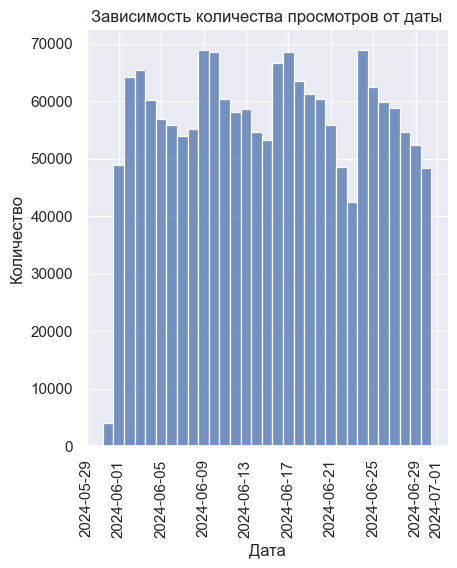

In [44]:
fig = sns.displot(date_col.dt.date)
plt.title('Зависимость количества просмотров от даты')
fig.ax.tick_params(axis='x', labelrotation=90)
plt.xlabel('Дата')
plt.ylabel('Количество')
plt.show()

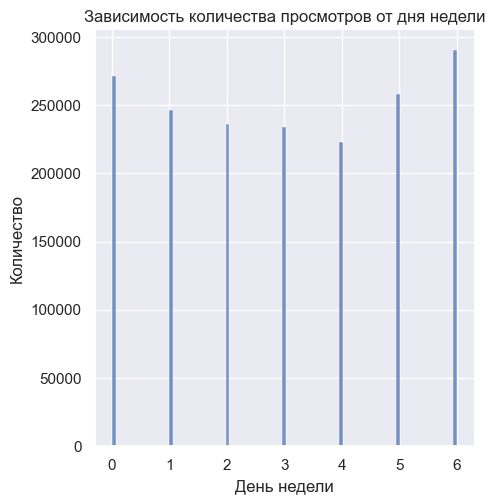

In [33]:
fig = sns.displot(date_col.dt.dayofweek)
plt.title('Зависимость количества просмотров от дня недели')
plt.xlabel('День недели')
plt.ylabel('Количество')
plt.show()